# Machine Learning and NLP

**Author**: Andrea Ballatore (Birkbeck, University of London)

**Abstract**: Learn how to use machine learning tools in Python with `sklearn` and natural language processing with `spacy`.

## Setup
This is to check that your environment is set up correctly (it should print 'env ok', ignore warnings).

In [84]:
# Test geospatial libraries
# check environment
import os
print("Conda env:", os.environ['CONDA_DEFAULT_ENV'])
if os.environ['CONDA_DEFAULT_ENV'] != 'geoprogv1':
    raise Exception("Set the environment 'geoprogv1' on Anaconda. Current environment: " + 
                    os.environ['CONDA_DEFAULT_ENV'])

# spatial libraries 
import fiona as fi
import pandas as pd
import geopandas
import time
import pysal as sal
import math
import geoplot
import json
import random
import scipy
import gzip
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import DivergingNorm
from sklearn import cluster
from sklearn import metrics
from sklearn.preprocessing import scale

# create tmp folder
if not os.path.exists('tmp'):
    os.makedirs('tmp')
# make sure the 'data' folder exists
if not os.path.exists('data'):
    os.makedirs('data')

print('env ok')

Conda env: geoprogv1
env ok


----
## Python packages

- As usual, in Python we use a **combination** of highly specialised packages to achieve a goal.
- `sklearn`: This is a popular package for Machine Learning in Python. https://scikit-learn.org
- `spacy`: This is a popular package for Natural Language Processing in Python. https://spacy.io

## Machine Learning
- **Machine Learning (ML)** is a broad area of computer science and data science that focusses on algorithms and techniques that can perform complex tasks by learning associations from data and detecting patterns. Unlike traditional methods, ML methods are designed to adapt to new data automatically.
- **Supervised learning** refers to methods in which the human user provides the algorithm with examples to analyse (_training_).
- **Unsupervised learning** refers to methods in which the algorithm tries to understand the data without training.
- Examples of successful application of ML include **image classification** (does this image include a car?), **prediction** (what will be the energy usage in 2022 based on 2020 and 2021?), and **clustering** (what types of neighbourhood exist?).
- Watch this [short video](https://www.youtube.com/watch?v=F1wlCerC40E) by the Royal Society.

### Clustering


- Clustering is a type of **unsupervised learning** in which an algorithm tries to group observations by some form of similarity, without having prior knowledge about them.
- The aim of clustering is to segregate groups with similar traits and assign them to clusters. Clustering has important applications in recommender systems, market segmentation (including geo-demography), social network analysis, medical imaging and classification, search result grouping, and anomaly detection.
- **Multi-dimensional data**. For example, we can have hundreds of variables describing the same objects. How can we understand these objects?

### Load multi-dimensional data

- As an example of multi-dimensional data, let us consider Borough profiles.
- Each London Borough is described through a large set of variables, including social, economic, and demographic aspects of the resindent population.

In [85]:
boro_df = geopandas.read_file("data/london_boroughs_profiles_2015.geojson")
print("N boroughs:",len(boro_df))
boro_df.head()

N boroughs: 33


,fid,gss,name,hectares,nonld_area,ons_inner,area_name,inner_outer_london,gla_population_estimate_2017,gla_household_estimate_2017,...,anxiety_score_2011_14_out_of_10,childhood_obesity_prevalance_pc_2015_16,people_aged_17_with_diabetes_pc,mortality_rate_from_causes_considered_preventable_2012_14,political_control_in_council,proportion_of_seats_won_by_conservatives_in_2014_election,proportion_of_seats_won_by_labour_in_2014_election,proportion_of_seats_won_by_lib_dems_in_2014_election,turnout_at_2014_local_elections,geometry
0,1,E09000021,Kingston upon Thames,3726.117,0.000,F,Kingston upon Thames,Outer London,175400.0,69848.523190,...,3.29,16.905615,4.855511,140.584911,None,58.333333,4.166667,37.500000,43.095285,"MULTIPOLYGON (((-0.33068 51.32901, -0.33059 51..."
1,2,E09000008,Croydon,8649.441,0.000,F,Croydon,Outer London,386500.0,159010.065250,...,3.30,24.481434,6.483704,178.212282,None,42.857143,57.142857,0.000000,38.600786,"MULTIPOLYGON (((-0.06402 51.31864, -0.06408 51..."
2,3,E09000006,Bromley,15013.487,0.000,F,Bromley,Outer London,327900.0,140602.291301,...,3.26,15.998786,5.242389,148.495392,None,85.000000,11.666667,0.000000,40.833978,"MULTIPOLYGON (((0.01213 51.29960, 0.01196 51.2..."
3,4,E09000018,Hounslow,5658.541,60.755,F,Hounslow,Outer London,274200.0,105886.898085,...,3.39,24.091261,6.480170,165.832643,None,18.333333,81.666667,0.000000,36.806201,"MULTIPOLYGON (((-0.24456 51.48870, -0.24468 51..."
4,5,E09000009,Ealing,5554.428,0.000,F,Ealing,Outer London,351600.0,132662.966475,...,3.57,23.822792,6.919389,163.540922,None,17.391304,76.811594,5.797101,41.175546,"MULTIPOLYGON (((-0.41183 51.53408, -0.41188 51..."


In [3]:
# The df contains a large number of variables describing the boroughs:
boro_df.columns

Index(['fid', 'gss', 'name', 'hectares', 'nonld_area', 'ons_inner',
       'area_name', 'inner_outer_london', 'gla_population_estimate_2017',
       'gla_household_estimate_2017', 'inland_area_hectares',
       'population_density_per_hectare_2017', 'average_age_2017',
       'proportion_of_population_aged_0_15_2015',
       'proportion_of_population_of_working_age_2015',
       'proportion_of_population_aged_65_and_over_2015',
       'net_internal_migration_2015', 'net_international_migration_2015',
       'net_natural_change_2015', 'pc_of_resident_population_born_abroad_2015',
       'largest_migrant_population_by_country_of_birth_2011',
       'pc_of_largest_migrant_population_2011',
       'second_largest_migrant_population_by_country_of_birth_2011',
       'pc_of_second_largest_migrant_population_2011',
       'third_largest_migrant_population_by_country_of_birth_2011',
       'pc_of_third_largest_migrant_population_2011',
       'pc_of_population_from_bame_groups_2016',
       'p

### Vectors and cosine similarity

- The quantification of similarity is at the core of data science and ML. 
- In many analyses, we want to be able to quantify how similar objects are to be able to classify and group them. 
- To think about similarity, we can imagine these objects as points in an abstract **n-dimensional vector space**. Each object is a point represented as a vector with values, e.g. `[0, 3, 1]`.
- Objects with similar attributes will end up relatively close to each other in this space, while dissimilar objects will be distant, and this information can be used to classify them.
- This idea is at the core of many ML techniques.
- The geographic space is an example of a 3 or 2-dimensional space with points that can be more or less close to each other.

- As an example of a **vector space**, we can define 4 vectors describing objects in 4 dimensions, which could represent any attribute. 
- For a person, these dimensions could be age, income, height, and number of children. For a city, they could represent population, area, and median household income.

In [4]:
vec1 = np.array([[1,1,3,1]])
vec2 = np.array([[0,1,2,1]])
vec3 = np.array([[10,34,2,0]])
vec4 = np.array([[9,31,2,1]])
vectors = [vec1, vec2, vec3, vec4]

- Of these 4 objects, the first two and the last two are more similar to each other than to the other objects. If you think of these dimensions as geo-coordinates, the largest the difference between them, the larger the distance.
- This means that the distance between `vec1` and `vec2` is smaller than the distance between `vec1` and `vec3`.
- To use this intuition, we can use **cosine similarity** to calculate the similarity between two vectors. This is a well-known method where $A$ and $B$ are two vectors with $n$ dimensions:

<img src="img/cosine.png" width=400 />

In [86]:
for a in vectors:
    print("\na:", a)
    for b in vectors:
        # calculate cosine similarity
        sim = metrics.pairwise.cosine_similarity(a, b).tolist()[0][0]
        # calculate distance
        dist = 1 - sim
        # show result
        print("\tb: {} sim={} dist={}".format(b,round(sim,4), round(dist,4)))


a: [[1 1 3 1]]
	b: [[1 1 3 1]] sim=1.0 dist=-0.0
	b: [[0 1 2 1]] sim=0.9428 dist=0.0572
	b: [[10 34  2  0]] sim=0.4066 dist=0.5934
	b: [[ 9 31  2  1]] sim=0.4193 dist=0.5807

a: [[0 1 2 1]]
	b: [[1 1 3 1]] sim=0.9428 dist=0.0572
	b: [[0 1 2 1]] sim=1.0 dist=-0.0
	b: [[10 34  2  0]] sim=0.437 dist=0.563
	b: [[ 9 31  2  1]] sim=0.4542 dist=0.5458

a: [[10 34  2  0]]
	b: [[1 1 3 1]] sim=0.4066 dist=0.5934
	b: [[0 1 2 1]] sim=0.437 dist=0.563
	b: [[10 34  2  0]] sim=1.0 dist=0.0
	b: [[ 9 31  2  1]] sim=0.9995 dist=0.0005

a: [[ 9 31  2  1]]
	b: [[1 1 3 1]] sim=0.4193 dist=0.5807
	b: [[0 1 2 1]] sim=0.4542 dist=0.5458
	b: [[10 34  2  0]] sim=0.9995 dist=0.0005
	b: [[ 9 31  2  1]] sim=1.0 dist=0.0


- If we observe these results, we can see that the similarity score ranges between `0` (minimum similarity) and `1` (maximum similarity).
- Distance is usually defined as `1 - sim`. 
- Identical vectors have similarity `1` and distance `0`. 
- The further the vectors are in space, the similarity will tend to `0` and their distance will tend to `1`.
- These results show clearly how `vec1,vec2` and `vec3,vec4` are more similar to each other than to the other vectors.
- This idea is at the core of **clustering** and **classification**. Those pairs could be assigned to two clusters or two classes A and B.

### Correlation analysis

- When we work with real data, we need to create a vector space from real attributes. 
- Let us select a set of variables of interest describing the London borough profiles:

In [6]:
# select a handful of borough variables
interesting_vars = ['gla_household_estimate_2017','inland_area_hectares',
                    'population_density_per_hectare_2017', 'average_age_2017', 
                    'unemployment_rate_2015', 'gross_annual_pay_2016', 
                    'median_house_price_2015','turnout_at_2014_local_elections']

sel_boro_df = boro_df[['name','gss'] + interesting_vars + ['geometry']]
sel_boro_df.head()

,name,gss,gla_household_estimate_2017,inland_area_hectares,population_density_per_hectare_2017,average_age_2017,unemployment_rate_2015,gross_annual_pay_2016,median_house_price_2015,turnout_at_2014_local_elections,geometry
0,Kingston upon Thames,E09000021,69848.523190,3726.1176,47.073125,37.1,4.5,37979.0,410000.0,43.095285,"MULTIPOLYGON (((-0.33068 51.32901, -0.33059 51..."
1,Croydon,E09000008,159010.065250,8650.3635,44.680203,37.0,4.1,32696.0,300000.0,38.600786,"MULTIPOLYGON (((-0.06402 51.31864, -0.06408 51..."
2,Bromley,E09000006,140602.291301,15013.4892,21.840359,40.2,5.3,37682.0,374975.0,40.833978,"MULTIPOLYGON (((0.01213 51.29960, 0.01196 51.2..."
3,Hounslow,E09000018,105886.898085,5597.7912,48.983606,35.8,4.3,31001.0,355000.0,36.806201,"MULTIPOLYGON (((-0.24456 51.48870, -0.24468 51..."
4,Ealing,E09000009,132662.966475,5554.4305,63.300819,36.2,5.8,31331.0,430000.0,41.175546,"MULTIPOLYGON (((-0.41183 51.53408, -0.41188 51..."


- Before clustering, we must check which variables are strongly **correlated**. A high level of correlation reduces the usefulness of variables in our vector space in characterising the objects we are studying.

<AxesSubplot:>

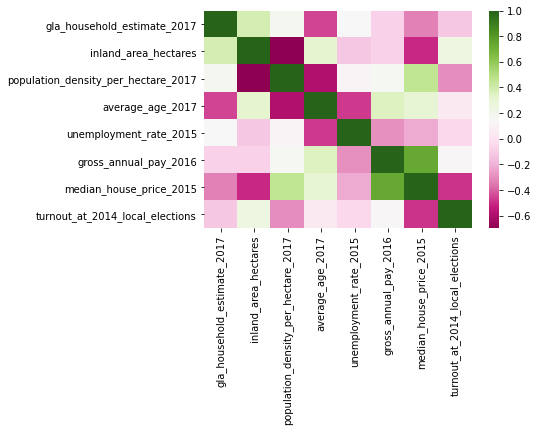

In [7]:
corr = sel_boro_df.corr()
sns.heatmap(corr, cmap='PiYG',
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

- As largely expected, this correlation matrix shows that some borough variables are highly correlated. Median house price is very correlated with gross annual pay. Population density is negatively correlated with inland area.
- As a simple solution, we will remove median house price and inland area variables before proceeding.

In [88]:
sel_boro_df.drop(columns=['inland_area_hectares','median_house_price_2015'])
interesting_vars.remove('inland_area_hectares')
interesting_vars.remove('median_house_price_2015')
sel_boro_df.columns

Index(['name', 'gss', 'gla_household_estimate_2017', 'inland_area_hectares',
       'population_density_per_hectare_2017', 'average_age_2017',
       'unemployment_rate_2015', 'gross_annual_pay_2016',
       'median_house_price_2015', 'turnout_at_2014_local_elections',
       'geometry', 'cluster', 'cluster2vars'],
      dtype='object')

### Normalisation
- A common problem is that attributes can have widely different **ranges**. For example, percentage of unemployed citizens might range from 5 to 30, while median income can range from 16,000 to 800,000.
- These variables would contribute to a distance (and similarity) calculation very unevenly, with variables with large ranges being more important than variables with smaller ranges.
- To solve this problem, we can **normalise** the variables so that they will all range from `0` to `1`.

In [89]:
from sklearn.preprocessing import MinMaxScaler

# use sklearn to scale all variables between 0 and 1
norm_vals = MinMaxScaler().fit_transform(sel_boro_df[interesting_vars])
# This matrix represents the 5 attributes for 33 boroughs 
# all between 0 and 1. The order of the rows and columns is the same.
# For convenience, we can visualise it as a data frame:
pd.DataFrame(norm_vals)

,0,1,2,3,4,5
0,0.419839,0.188614,0.483051,0.097222,0.708032,0.764004
1,1.000000,0.170727,0.474576,0.041667,0.337425,0.505450
2,0.880223,0.000000,0.745763,0.208333,0.687197,0.633918
3,0.654336,0.202894,0.372881,0.069444,0.218520,0.402213
4,0.828563,0.309915,0.406780,0.277778,0.241670,0.653567
5,0.642697,0.005938,0.754237,0.208333,0.386671,0.762385
6,0.686483,0.031207,0.423729,0.277778,0.394388,0.359490
7,0.567599,0.210472,0.584746,0.111111,0.372922,0.625309
8,0.752988,0.410947,0.355932,0.513889,0.135110,0.371481
9,0.950632,0.172456,0.500000,0.652778,0.389828,0.613612


### Multidimensional clustering
- Now we can try to identify clusters of similar boroughs based on these 5 attributes.
- **K-means** is one of the most common techniques. K-means uses distances in the vector space to identify groups of points appear more clustered than average:

<img src="img/kmeans.gif" width=400 />

- Clustering is an crucial area of research in data science and many other algorithms exist. Python provides implementations of K-means and many other clustering algorithms that follow different approaches.
- Let us apply `sklearn`'s [K-means](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html) to our borough data. This [guide](https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_digits.html) is very useful to understand how K-means works.
- Before applying K-means, we have to handle missing data (the algorithm does not work with missing data). A common strategy consists of setting the average value for the attribute so that it will not skew the results:

In [90]:
def impute_nan_with_col_mean(x):
    """ Replace nan values with the column mean in the @x ndarray """
    col_mean = np.nanmean(x, axis=0)
    print("col means:",col_mean)
    # get the means for each column of normalised values
    # find indices with nan values that we need to replace
    inds = np.where(np.isnan(x))
    # Place column means in the indices. Align the arrays using take
    x[inds] = np.take(col_mean, inds[1])
    return x

In [92]:
norm_vals = impute_nan_with_col_mean(norm_vals)
pd.DataFrame(norm_vals)

col means: [0.67557063 0.39345937 0.42167437 0.31640625 0.44020774 0.51908758]


,0,1,2,3,4,5
0,0.419839,0.188614,0.483051,0.097222,0.708032,0.764004
1,1.000000,0.170727,0.474576,0.041667,0.337425,0.505450
2,0.880223,0.000000,0.745763,0.208333,0.687197,0.633918
3,0.654336,0.202894,0.372881,0.069444,0.218520,0.402213
4,0.828563,0.309915,0.406780,0.277778,0.241670,0.653567
5,0.642697,0.005938,0.754237,0.208333,0.386671,0.762385
6,0.686483,0.031207,0.423729,0.277778,0.394388,0.359490
7,0.567599,0.210472,0.584746,0.111111,0.372922,0.625309
8,0.752988,0.410947,0.355932,0.513889,0.135110,0.371481
9,0.950632,0.172456,0.500000,0.652778,0.389828,0.613612


- Now we are ready to apply k-means to our data:

In [93]:
from sklearn.cluster import KMeans

# first, we call k-means on our borough vector space, 
# looking for 4 clusters
kmeans = KMeans(n_clusters=4, random_state=42).fit(norm_vals)

# read clusters: for each borough, k-means assigns a 
# cluster, numbering them from 0
borough_clusters = kmeans.labels_
# print cluster labels
str(borough_clusters.tolist())

'[3, 1, 3, 1, 1, 3, 1, 3, 0, 0, 2, 0, 1, 0, 3, 1, 1, 0, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 1, 0, 0, 3]'

In [96]:
# note that this works because the order of rows does not change
# in every step of the procedure. In general, we have to be 
# very careful with this kind of approach to combine datasets.
sel_boro_df['cluster'] = borough_clusters
# the column cluster contains the cluster of each borough:
for cluster,df in sel_boro_df.groupby('cluster'):
    boroughs_str = ", ".join(df.name)
    print("\ncluster",cluster,": ",boroughs_str)


cluster 0 :  Brent, Barnet, Southwark, Greenwich, Redbridge, Newham, Barking and Dagenham

cluster 1 :  Croydon, Hounslow, Ealing, Hillingdon, Lewisham, Enfield, Waltham Forest, Haringey

cluster 2 :  Lambeth, Wandsworth, Hammersmith and Fulham, Kensington and Chelsea, Westminster, Camden, Tower Hamlets, Islington, Hackney

cluster 3 :  Kingston upon Thames, Bromley, Havering, Harrow, Bexley, Sutton, Richmond upon Thames, Merton, City of London


- Visualising the results geographically is useful. Note that the geographic space and the abstract vector space with the attributes are completely separate.

Text(0.5, 1.0, 'Clustering of London boroughs based on 6 attributes')

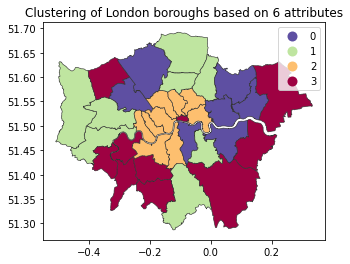

In [98]:
sel_boro_df.plot(column='cluster', categorical=True, cmap='Spectral_r', 
    linewidth=.6, edgecolor='0.2', legend=True)
plt.title("Clustering of London boroughs based on 6 attributes")

- Interestingly, this shows that k-means has identified groups of contiguous boroughs as clusters, confirming a common geographic phenomenon (i.e., nearby boroughs tend to be more similar than far away ones).

### Clustering in 2 dimensions

- Depending on what variables we select for our vector space, we can obtain very different clusters. To illustrate the process in a clearer way, let us run k-means only on `unemployment_rate_2015` and `average_age_2017`.
- This allows us to visualise the results directly in 2-dimensional plots.

In [99]:
two_vars = ['unemployment_rate_2015','average_age_2017']
# scale/normalise data
norm_vals = MinMaxScaler().fit_transform(sel_boro_df[two_vars])
# impute missing values
norm_vals = impute_nan_with_col_mean(norm_vals)
pd.DataFrame(norm_vals)

col means: [0.31640625 0.42167437]


,0,1
0,0.097222,0.483051
1,0.041667,0.474576
2,0.208333,0.745763
3,0.069444,0.372881
4,0.277778,0.406780
5,0.208333,0.754237
6,0.277778,0.423729
7,0.111111,0.584746
8,0.513889,0.355932
9,0.652778,0.500000


Text(0.5, 1.0, 'Clustering of London boroughs based on 2 variables')

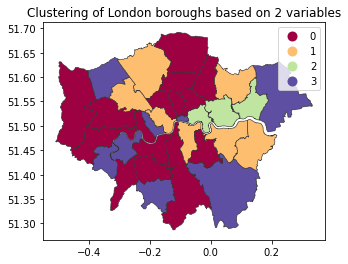

In [100]:
# run kmeans
kmeans = KMeans(n_clusters=4, random_state=42).fit(norm_vals)
# save results
sel_boro_df['cluster2vars'] = kmeans.labels_
# scatter plot
sel_boro_df.plot(column='cluster2vars', categorical=True, cmap='Spectral', 
    linewidth=.6, edgecolor='0.2', legend=True)
plt.title("Clustering of London boroughs based on 2 variables")

- To understand the results of a clustering method, we must look at the **cluster centres**. These are points that represent the centre of a cluster, i.e., its most typical member. 
- As we get further from the centre, members become less typical. This matches the intuition that some individuals can be more or less typical of a group (e.g., pigeons are more typical in the 'bird' cluster than penguins). 

In [101]:
# columns: 'unemployment_rate_2015','average_age_2017'
# rows: the clusters
print(kmeans.cluster_centers_)

[[0.17013889 0.35911017]
 [0.58531746 0.42372881]
 [0.8287037  0.06214689]
 [0.16226438 0.71670702]]


[Text(0.5, 1.0, 'Clusters of London boroughs (k-means, 4 clusters)'),
 Text(0.5, 0, 'unemployment_rate_2015 (norm)'),
 Text(0, 0.5, 'average_age_2017 (norm)')]

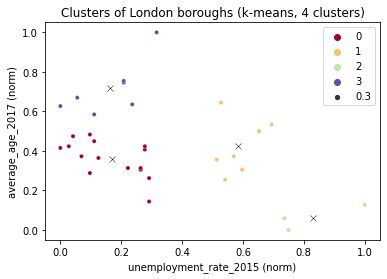

In [102]:
# plot clusters in 2D space
fig, ax = plt.subplots()
# plot all boroughs as points in the vector space
sns.scatterplot(x=norm_vals[:,0], y=norm_vals[:,1], size=.3,
                hue=kmeans.labels_, palette='Spectral', ax=ax)
# plot cluster centroids as X
sns.scatterplot(x=kmeans.cluster_centers_[:,0], y=kmeans.cluster_centers_[:,1], 
                color='black', marker = "x", ax=ax)
ax.set(title="Clusters of London boroughs (k-means, 4 clusters)", 
       xlabel='unemployment_rate_2015 (norm)', ylabel='average_age_2017 (norm)')

- This example is actually just a starting point of a cluster analysis. K-means is normally executed on different numbers of clusters (e.g., 4, 6, 8, etc.) and on different subset of dimensions to study how it behaves. 
- **Cluster validation** is essential to make sure that the clustering method is appropriate. Diagnostic metrics exist to try to quantify to what extent the clustering captures the variability in the data correctly.

## Natural language processing (NLP)

- A lot of data exist in the form of unstructured text, for example as social media messages, newspaper articles, and corporate reports. "Natural language" refers to human languages like English, Arabic, and Yoruba, in contrast to machine languages like Python and JavaScript.
- NLP comprises all technologies and techniques to extract information and insights contained in text documents, as well as to categorize and organize the documents themselves.
- In scientific research, NLP is used to analyse large amounts of text in fields as diverse as computational linguistics, computer science, sociology, political science, criminology, law, and geography.
- Industrial applications of NLP include spam detection, automatic summarisation, machine translation, sentiment analysis, and geoparsing, which we find in popular online products.
- The package `spacy` is one of the most used NLP packages in Python and provides a lot of clear tutorials, e.g., [tutorial 1](https://realpython.com/natural-language-processing-spacy-python/#how-to-download-models-and-data) and [tutorial 2](https://spacy.io/usage/spacy-101).

### Spacy setup 

- To perform NLP tasks, `spacy` needs a **language model** that contains structured information extracted from large amounts of text.
- Depending on how the model is constructed and its data sources, the results will vary a lot. For example, a language model built to handle customer feedback for an energy company will perform poorly to classify travel blogs, because the linguistic and semantic structures used in the two contexts are very different.
- The language model we will use is _en_core_web_sm_:

<img src="img/model.png" width=600 />

In [18]:
# install language model
!python -m spacy download en_core_web_sm
# Note: if this cell does not work, run the same command 
#       without "!" in the Anaconda terminal

     |████████████████████████████████| 13.7 MB 1.1 MB/s eta 0:00:01
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [103]:
# set up the spacy environment
import spacy
from spacy import displacy
from collections import Counter
spacy.prefer_gpu()
# load language model
import en_core_web_sm
nlp = en_core_web_sm.load()

### Loading a corpus

- In NLP, a set of text documents is called _corpus_ (plural _corpora_). Corpora can vary from very large and generic (e.g., 5 billion documents randomly selected from the web) to small and highly specific (e.g., all recorded speeches in the Scottish Parliament in 2020).
- Corpora can be stored in a variety of formats. In this example we will consider a corpus of travel blogs stored in a text file with 1 JSON document per line, corresponding to a single travel blog post.

In [104]:
corpus_json = "data/travel_blogs_dublin_vienna_2016.json.gz"
posts = []
with gzip.open(corpus_json, 'r') as fin:
    for line in fin.readlines():
        blog_post = json.loads(line)
        posts.append(blog_post)

print("Loaded",len(posts),"posts")

Loaded 2127 posts


In [106]:
# read a random post
post = random.choice(posts)
print(post['title'])
print(post['url'])
print("\n", post['text'])

Guinness Factory and Temple Bar | Travel Blog
https://www.travelblog.org/Europe/Ireland/County-Dublin/Dublin/blog-915317-84.html

  Europe &raquo;&nbsp; Ireland &raquo;&nbsp; County Dublin &raquo;&nbsp; Dublin January 14th 2016  Published: January 14th 2016 EDIT THIS ENTRY Today Tabi and I learned how to pour the perfect Guinness! Interesting fact Auther Guinness signed a 9000 year lease on the building....guess he was in it for the long run. Also the beautiful St. Stephen's Green was built by the Guinness family then donated to the city of Dublin. We also went into the popular temple bar for some Kilkenny's and live Irish music. A man named David Bowne broke the wo... Read Full Entry    Photos are below Photos: 94, Displayed: 21  &laquo; Back 1 2 3 4 5 Next &raquo;   
  &times;  Subscribe     Name     Email     Confirm Email         Close  Subscribe   



### Part of speech (POS) tagging

- **Tokenisation** is a basic operation that identifies linguistic units in the text, taking into account punctuation. Tokens are roughly equivalent to words.
- `spacy`, like most NLP packages, supports **Part-of-speech (POS)** tagging.
- Part of speech tags identify whether a token is a noun, a verb, an adjective or a pronoun. This information is crucial to extract content from the text, for example to understand what the text is abount.
- Standardised **POS tags** are defined at https://universaldependencies.org/docs/u/pos/
- Let us tokenise and POS-tag some text. For clarity, let us use a highly regular, grammatically correct text fragment:

In [62]:
# load sample text with good grammar from Wikipedia 
# that is easy for the system to POS tag
sample_text = """Central place theory is a geographical theory that seeks to explain the 
number, size and location of human settlements in a residential system. It was 
introduced in 1933 to explain the spatial distribution of cities across the 
landscape. The theory was first analyzed by German geographer Walter Christaller, 
who asserted that settlements simply functioned as 'central places' providing 
services to surrounding areas.
The newly reclaimed polders of the Netherlands provide an isotropic plane on 
which settlements have developed and in certain areas 6 small towns can be seen surrounding
a larger town, especially in the Noord-Oostpolder and Flevoland. The Fens of East 
Anglia in the UK also provide a large expanse of flat land with no natural barriers to 
settlement development. Cambridge is a good example of a K=4 Transport Model Central Place, 
although it is surrounded by 7, rather than 6, settlements.
Economic status of consumers in an area is also important. Consumers of higher economic 
status tend to be more mobile and therefore bypass centers providing only lower order goods. 
The application of central place theory must be tempered by an awareness of such factors when 
planning shopping center space location."""

In [107]:
# load text in spacy
doc = nlp(sample_text)

pos_df = pd.DataFrame()

# scan all tokens and get their POS, and add the result to a data frame
for token in doc:
    pos_df = pos_df.append(pd.DataFrame(
        {"token":token.text, "pos_tag":token.pos_}, index=[0]), ignore_index=True)
# save results to a file
pos_df.to_csv('tmp/pos_tags.csv', index=False)
pos_df

,token,pos_tag
0,Central,ADJ
1,place,NOUN
2,theory,NOUN
3,is,AUX
4,a,DET
...,...,...
222,shopping,NOUN
223,center,NOUN
224,space,NOUN
225,location,NOUN


In [108]:
# get all proper nouns from the results and count their occurrences
pos_df[pos_df.pos_tag=='PROPN'].token.value_counts()

Noord          1
Netherlands    1
Cambridge      1
Oostpolder     1
Transport      1
Fens           1
East           1
Model          1
Walter         1
UK             1
Christaller    1
K=4            1
Flevoland      1
Central        1
Anglia         1
Place          1
Name: token, dtype: int64

In [109]:
# get all numbers from the results and count their occurrences
pos_df[pos_df.pos_tag=='NUM'].token.value_counts()

6       2
7       1
1933    1
Name: token, dtype: int64

In [110]:
# get all verbs from the results and count their occurrences
pos_df[pos_df.pos_tag=='VERB'].token.value_counts()

surrounding    2
provide        2
providing      2
explain        2
be             1
analyzed       1
planning       1
introduced     1
seeks          1
asserted       1
tempered       1
developed      1
functioned     1
tend           1
surrounded     1
reclaimed      1
seen           1
Name: token, dtype: int64

### Lemmatisation

- Words can appear in different forms: nouns can be singular or plural and verbs have conjugations. Lemmatisation consists of identifying the base form of a word to be able to count it correctly. 
- For example, the lemma of “was” is “be”, and the lemma of “rats” is “rat”.

In [111]:
# load text in spacy
doc = nlp(sample_text)

lemmas_df = pd.DataFrame()

# scan all tokens and get their POS, and add the result to a data frame
for token in doc:
    lemmas_df = lemmas_df.append(pd.DataFrame(
        {"token":token.text, "lemma":token.lemma_, "pos_tag":token.pos_}, 
        index=[0]), ignore_index=True)

# check lemmas of verbs
lemmas_df[lemmas_df.pos_tag=='VERB']

,token,lemma,pos_tag
8,seeks,seek,VERB
10,explain,explain,VERB
29,introduced,introduce,VERB
33,explain,explain,VERB
48,analyzed,analyze,VERB
57,asserted,assert,VERB
61,functioned,function,VERB
67,providing,provide,VERB
71,surrounding,surround,VERB
77,reclaimed,reclaim,VERB


### Stop words

- To extract the **content words** from a document, we might want to remove words that do not refer to specific entities. These words are called **stop words** and a language model will provide them:

In [114]:
all_stopwords = nlp.Defaults.stop_words
str(random.sample(list(all_stopwords),20))

"['any', '‘d', 'here', 'became', 'all', 'put', 'about', 'six', 'and', 'were', 'how', '‘ve', 'former', 'into', 'nobody', 'was', 'when', 'seems', 'afterwards', 'he']"

In [116]:
# remove stop words from the input text

# get all tokens
text_tokens = [token.lemma_.lower() for token in doc]
# remove stop words
tokens_without_sw = [word for word in text_tokens if not word in all_stopwords]

print(tokens_without_sw)

['central', 'place', 'theory', 'geographical', 'theory', 'seek', 'explain', '\n', 'number', ',', 'size', 'location', 'human', 'settlement', 'residential', 'system', '.', '\n', 'introduce', '1933', 'explain', 'spatial', 'distribution', 'city', '\n', 'landscape', '.', 'theory', 'analyze', 'german', 'geographer', 'walter', 'christaller', ',', '\n', 'assert', 'settlement', 'simply', 'function', "'", 'central', 'place', "'", 'provide', '\n', 'service', 'surround', 'area', '.', '\n', 'newly', 'reclaim', 'polder', 'netherlands', 'provide', 'isotropic', 'plane', '\n', 'settlement', 'develop', 'certain', 'area', '6', 'small', 'town', 'surround', '\n', 'large', 'town', ',', 'especially', 'noord', '-', 'oostpolder', 'flevoland', '.', 'fens', 'east', '\n', 'anglia', 'uk', 'provide', 'large', 'expanse', 'flat', 'land', 'natural', 'barrier', '\n', 'settlement', 'development', '.', 'cambridge', 'good', 'example', 'k=4', 'transport', 'model', 'central', 'place', ',', '\n', 'surround', '7', ',', '6', '

### Named entity recognition (NER)

- In many scenarios, we want to identify not only if tokens are nouns or verbs, but what kind of entity they refer to. For example, does a group of tokens represent a date or a person's name? 
- `spacy` can identify Named Entities (NE) in text.

In [117]:
# load text in spacy
doc = nlp(sample_text.replace('\n', '  '))

nentities_df = pd.DataFrame()

# scan all entities found in the document and add the result to a data frame
for ent in doc.ents:
    nentities_df = nentities_df.append(pd.DataFrame(
        {"text":ent.text, "label":ent.label_}, 
        index=[0]), ignore_index=True)

nentities_df.to_csv('tmp/named_entities.csv', index=False)

- The types of named entities detected by the model we are using include _person_, _date_, _organisation_, _time_, etc.

In [118]:
# spacy provides a user-friendly visualisation of Named Entities:
displacy.render(doc, style="ent")

### Geoparsing

- **Geoparsing** consists of all tasks related to extracting geographic information from text and is an active research area and presents interesting challenges, including semantic ambiguity. 
- In geographic data science, **geocoding** is one of the most common geoparsing tasks and focuses on the association of a place name (toponym) or an address to a geolocation.
- As an example, the `geocoder` package finds geocoordinates for place names through OpenStreetMap: https://geocoder.readthedocs.io/providers/OpenStreetMap.html

In [119]:
import geocoder

def get_locations_from_text_with_osm(doc):
    """ Find locations in spacy document and return data frame. """
    locations_df = pd.DataFrame()
    for entity in doc.ents:
        # select only Place entities
        if entity.label_ in ['GPE','FAC','LOC']:
            g = geocoder.osm(entity.text)
            # skip if no location found
            if len(g.latlng)!=2: 
                continue
            # This is a courtesy delay of 200 ms to avoid hammering the OSM servers.
            time.sleep(.2)
            # build row
            row = pd.DataFrame({'text': [entity.text], 'place_name': [g.location],
                              'lat_y': [g.latlng[0]], 'lon_x': [g.latlng[1]]})
            # add row to results
            locations_df = locations_df.append(row, ignore_index=True)

    print("found",len(locations_df),'locations')
    return locations_df

In [120]:
# run on sample text
doc = nlp(sample_text)
get_locations_from_text_with_osm(doc)

found 3 locations


,text,place_name,lat_y,lon_x
0,Netherlands,Netherlands,52.500170,5.748082
1,UK,UK,54.702354,-3.276575
2,Cambridge,Cambridge,52.197585,0.139154


In [124]:
# get locations for a random blog post:
post = random.choice(posts)

# just to avoid a very long text
length_limit_char = 1000
random_text = post['text'][:length_limit_char]
# load text in spacy
doc = nlp(random_text)
# get locations
df = get_locations_from_text_with_osm(doc)
df

found 6 locations


,text,place_name,lat_y,lon_x
0,Vienna,Vienna,48.208354,16.372504
1,Florence,Florence,43.769871,11.255576
2,Rome,Rome,41.893320,12.482932
3,Italy,Italy,42.638426,12.674297
4,Rome,Rome,41.893320,12.482932
5,Venice,Venice,45.437191,12.334590


In [125]:
# show named entities in the text
displacy.render(doc, style="ent")

- It is likely that these results will contain errors. This is common in NLP as the variability and complexity of language is such that most of the time it is simply impossible to obtain full accuracy.
- Whether results are acceptable or not depends entirely on the purpose of the analysis.
- You can continue your exploration of NLP at https://spacy.io/usage/spacy-101

_____

End of notebook